In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-space-apps-beyond-sunlight-oceanic-worlds/exoplanetParameters.csv
/kaggle/input/nasa-space-apps-beyond-sunlight-oceanic-worlds/Sabit_Degerler.xlsx
/kaggle/input/nasa-space-apps-beyond-sunlight-oceanic-worlds/exoplanetParameters.xlsx


In [2]:
df=pd.read_csv('/kaggle/input/nasa-space-apps-beyond-sunlight-oceanic-worlds/exoplanetParameters.csv')
df1=pd.read_excel('/kaggle/input/nasa-space-apps-beyond-sunlight-oceanic-worlds/Sabit_Degerler.xlsx')

In [3]:
df1

,Parametreler,w (açısal hız),mh (okyanus kütlesi),ro (sıvı yoğunluğu),M (gezegen kütlesi),R (gezegen yarıçap),Vh (hareket eden kütle),V0 (okyanus hacmi),P0 (atmosfer basıncı),A (yüzey alanı),...,yaşam potansiyeli,güneşe olan uzaklık,üzerlerine etki eden manyetik alan,tuzluluk oranı,C (karbon),N (azot),O (oksijen),H (hidrojen),P (fosfor),S (kükürt)
0,Europa,2.0479*10^(-5),1.752*10^22,1100.0,4.7998*10^22,1.5608*10^6,0.020,1.593*10^19,1.035*10^(-6),3.9*10^13,...,yüksek,7.8*10^11,2.77*10^(-21),%5.5,yok,yok,yok,yok,yok,yok
1,Titan,4.561*10^(-6),1.346*10^23,1879.8,1.345*10^23,2.575*10^6,0.010,7.16*10^19,1.294*10^(-6),8.3*10^13,...,düşük,1.424*10^12,1.16*10^(-23),%3.5,var,var,var,var,var,var
2,Encladus,5.3037*10^(-5),1.080*10^20,1609.0,1.080*10^20,2.521*10^5,0.010,6.705*10^16,1.035*10^(-6),7.986*10^13,...,yüksek,1.424*10^12,1.47*10^(-21),%2.5,var,var,var,var,var,var
3,Calisto,4.3575*10^(-6),1.07596*10^23,1834.4,1.075938*10^23,2.4103*10^6,0.010,5.865*10^19,1.850*10^(-6),7.30*10^13,...,düşük,7.78*10^11,6.44*10^(-23),%7.5,yok,yok,yok,yok,yok,yok
4,Dünya (Pasifik Okyanusu),7.27*10^(-5),6.78*10^20,1025.0,7.2775*10^20,7.25*10^6,0.025,6.61*10^17,101325,1.6525*10^14,...,yüksek,1.49*10^11,2.5*10^(-5),%3.5,var,var,var,var,var,var
5,Türe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1['hidrotermal menfez varlığı'] = df1['hidrotermal menfez varlığı'].apply(lambda x: True if x == 'var' else False)
df1['silikatlar'] = df1['silikatlar'].apply(lambda x: True if x == 'var' else False)
df1['feldispatlar'] = df1['feldispatlar'].apply(lambda x: True if x == 'var' else False)
df1['yaşam potansiyeli'] = df1['yaşam potansiyeli'].apply(lambda x: True if x == 'yüksek' else False)
df1['C (karbon)'] = df1['C (karbon)'].apply(lambda x: True if x == 'var' else False)
df1['N (azot)'] = df1['N (azot)'].apply(lambda x: True if x == 'var' else False)
df1['O (oksijen)'] = df1['O (oksijen)'].apply(lambda x: True if x == 'var' else False)
df1['H (hidrojen)'] = df1['H (hidrojen)'].apply(lambda x: True if x == 'var' else False)
df1['P (fosfor)'] = df1['P (fosfor)'].apply(lambda x: True if x == 'var' else False)
df1['S (kükürt)'] = df1['S (kükürt)'].apply(lambda x: True if x == 'var' else False)

In [5]:
df1['hidrotermal menfez varlığı'] = df1['hidrotermal menfez varlığı'].astype(float)
df1['silikatlar'] = df1['silikatlar'].astype(float)
df1['feldispatlar'] = df1['feldispatlar'].astype(float)
df1['yaşam potansiyeli'] = df1['yaşam potansiyeli'].astype(float)
df1['C (karbon)'] = df1['C (karbon)'].astype(float)
df1['N (azot)'] = df1['N (azot)'].astype(float)
df1['O (oksijen)'] = df1['O (oksijen)'].astype(float)
df1['H (hidrojen)'] = df1['H (hidrojen)'].astype(float)
df1['P (fosfor)'] = df1['P (fosfor)'].astype(float)
df1['S (kükürt)'] = df1['S (kükürt)'].astype(float)

In [6]:
df1['tuzluluk oranı'] = df1['tuzluluk oranı'].str.replace('%', '')
df1['tuzluluk oranı'] = df1['tuzluluk oranı'].astype(float) / 100

In [7]:
df1['w (açısal hız)'] = df1['w (açısal hız)'].astype(str)
df1['w (açısal hız)'] = df1['w (açısal hız)'].apply(lambda x: eval(x.replace('^', '**')) if x != 'nan' else np.nan)
df1['mh (okyanus kütlesi)'] = df1['mh (okyanus kütlesi)'].astype(str)
df1['mh (okyanus kütlesi)'] = df1['mh (okyanus kütlesi)'].apply(lambda x: eval(x.replace('^', '**')) if x != 'nan' else np.nan)
df1['M (gezegen kütlesi)'] = df1['M (gezegen kütlesi)'].astype(str)
df1['M (gezegen kütlesi)'] = df1['M (gezegen kütlesi)'].apply(lambda x: eval(x.replace('^', '**')) if x != 'nan' else np.nan)
df1['R (gezegen yarıçap)'] = df1['R (gezegen yarıçap)'].astype(str)
df1['R (gezegen yarıçap)'] = df1['R (gezegen yarıçap)'].apply(lambda x: eval(x.replace('^', '**')) if x != 'nan' else np.nan)
df1['V0 (okyanus hacmi)'] = df1['V0 (okyanus hacmi)'].astype(str)
df1['V0 (okyanus hacmi)'] = df1['V0 (okyanus hacmi)'].apply(lambda x: eval(x.replace('^', '**')) if x != 'nan' else np.nan)
df1['P0 (atmosfer basıncı)'] = df1['P0 (atmosfer basıncı)'].astype(str)
df1['P0 (atmosfer basıncı)'] = df1['P0 (atmosfer basıncı)'].apply(lambda x: eval(x.replace('^', '**')) if x != 'nan' else np.nan)
df1['A (yüzey alanı)'] = df1['A (yüzey alanı)'].astype(str)
df1['A (yüzey alanı)'] = df1['A (yüzey alanı)'].apply(lambda x: eval(x.replace('^', '**')) if x != 'nan' else np.nan)
df1['güneşe olan uzaklık'] = df1['güneşe olan uzaklık'].astype(str)
df1['güneşe olan uzaklık'] = df1['güneşe olan uzaklık'].apply(lambda x: eval(x.replace('^', '**')) if x != 'nan' else np.nan)
df1['üzerlerine etki eden manyetik alan'] = df1['üzerlerine etki eden manyetik alan'].astype(str)
df1['üzerlerine etki eden manyetik alan'] = df1['üzerlerine etki eden manyetik alan'].apply(lambda x: eval(x.replace('^', '**')) if x != 'nan' else np.nan)

In [8]:
df1.drop(len(df1) - 1)
print(df1)

               Parametreler  w (açısal hız)  mh (okyanus kütlesi)  \
0                    Europa        0.000020          1.752000e+22   
1                     Titan        0.000005          1.346000e+23   
2                  Encladus        0.000053          1.080000e+20   
3                   Calisto        0.000004          1.075960e+23   
4  Dünya (Pasifik Okyanusu)        0.000073          6.780000e+20   
5                      Türe             NaN                   NaN   

   ro (sıvı yoğunluğu)  M (gezegen kütlesi)  R (gezegen yarıçap)  \
0               1100.0         4.799800e+22            1560800.0   
1               1879.8         1.345000e+23            2575000.0   
2               1609.0         1.080000e+20             252100.0   
3               1834.4         1.075938e+23            2410300.0   
4               1025.0         7.277500e+20            7250000.0   
5                  NaN                  NaN                  NaN   

   Vh (hareket eden kütle)  V0 (okyanus

In [9]:
df1

,Parametreler,w (açısal hız),mh (okyanus kütlesi),ro (sıvı yoğunluğu),M (gezegen kütlesi),R (gezegen yarıçap),Vh (hareket eden kütle),V0 (okyanus hacmi),P0 (atmosfer basıncı),A (yüzey alanı),...,yaşam potansiyeli,güneşe olan uzaklık,üzerlerine etki eden manyetik alan,tuzluluk oranı,C (karbon),N (azot),O (oksijen),H (hidrojen),P (fosfor),S (kükürt)
0,Europa,0.000020,1.752000e+22,1100.0,4.799800e+22,1560800.0,0.020,1.593000e+19,0.000001,3.900000e+13,...,1.0,7.800000e+11,2.770000e-21,0.055,0.0,0.0,0.0,0.0,0.0,0.0
1,Titan,0.000005,1.346000e+23,1879.8,1.345000e+23,2575000.0,0.010,7.160000e+19,0.000001,8.300000e+13,...,0.0,1.424000e+12,1.160000e-23,0.035,1.0,1.0,1.0,1.0,1.0,1.0
2,Encladus,0.000053,1.080000e+20,1609.0,1.080000e+20,252100.0,0.010,6.705000e+16,0.000001,7.986000e+13,...,1.0,1.424000e+12,1.470000e-21,0.025,1.0,1.0,1.0,1.0,1.0,1.0
3,Calisto,0.000004,1.075960e+23,1834.4,1.075938e+23,2410300.0,0.010,5.865000e+19,0.000002,7.300000e+13,...,0.0,7.780000e+11,6.440000e-23,0.075,0.0,0.0,0.0,0.0,0.0,0.0
4,Dünya (Pasifik Okyanusu),0.000073,6.780000e+20,1025.0,7.277500e+20,7250000.0,0.025,6.610000e+17,101325.000000,1.652500e+14,...,1.0,1.490000e+11,2.500000e-05,0.035,1.0,1.0,1.0,1.0,1.0,1.0
5,Türe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

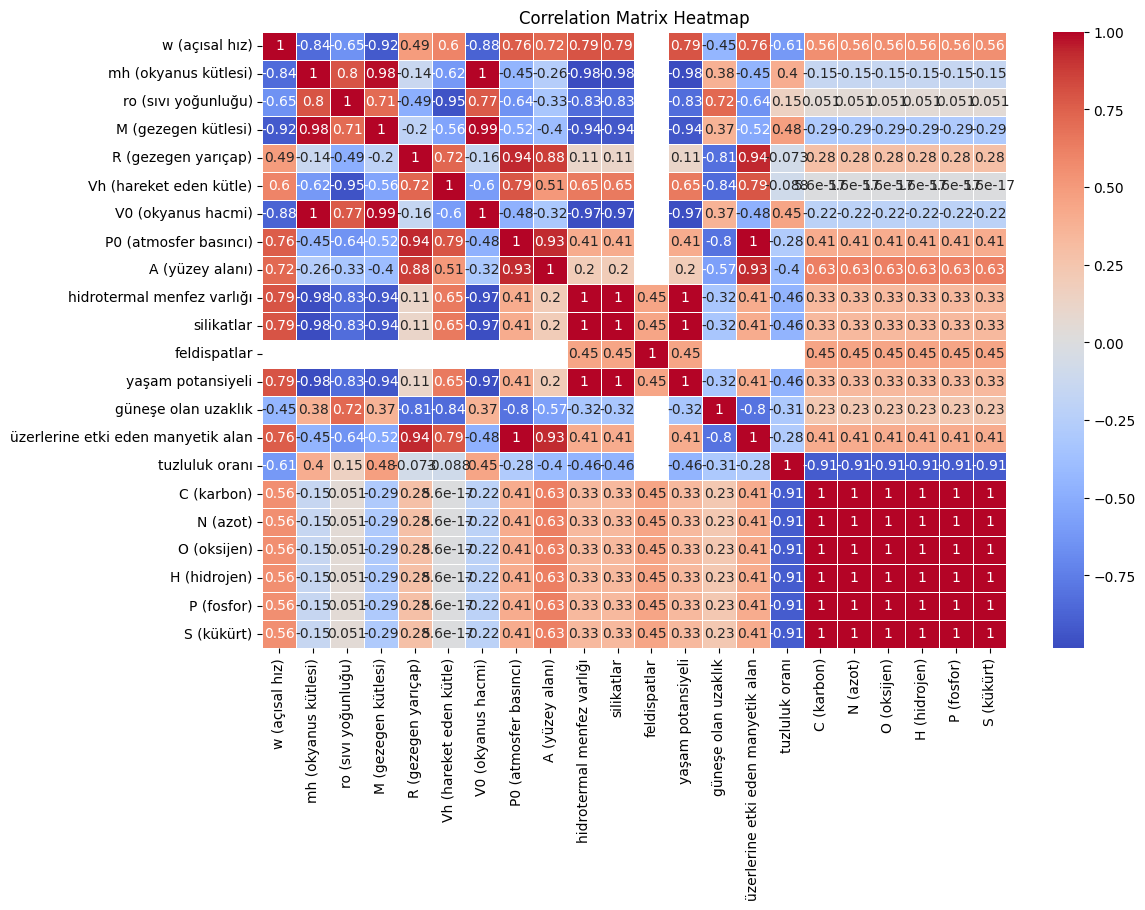

In [11]:
df_numerical = df1.select_dtypes(include=['number'])

corr_matrix = df_numerical.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor

In [14]:
selected_features = ['w (açısal hız)', 'mh (okyanus kütlesi)', 'ro (sıvı yoğunluğu)', 'M (gezegen kütlesi)', 'V0 (okyanus hacmi)', 'Vh (hareket eden kütle)']  # Örnek özellik isimleri

# Bu özellikleri kullanarak X ve y'yi yeniden tanımlayın
X_selected = df1[selected_features]  # Belirli 6 özellik
y = df1['yaşam potansiyeli']

# Eğitim ve test olarak veri setini bölme
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Model oluşturma ve eğitme
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

# Tahmin için belirli bir veri noktası
new_data = [[0.0000000000000001, 1.400000000000000000000, 1025.0, 5970000000000000000000000, 1332000000000000000, 1000000000000]]

# Tahmin yapma
predicted_value = model.predict(new_data)
print(f"Tahmin Edilen Değer: {predicted_value[0]:.2f}")


Tahmin Edilen Değer: 0.50


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


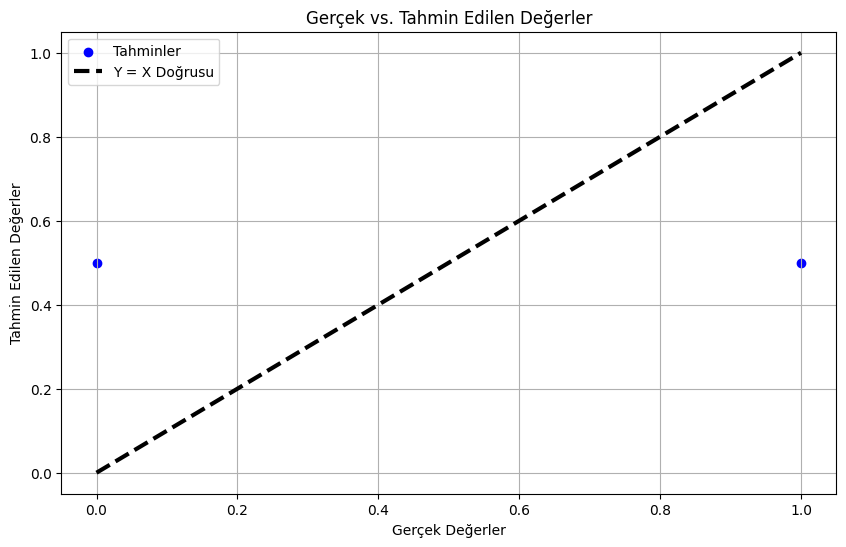

In [15]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Tahminler')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Y = X Doğrusu')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.legend()
plt.grid(True)
plt.show()

# tahmin noktası y=x doğrusuna yakın oldukça daha iyi sonuç elde edilir.